# Applying Classification Modeling
The goal of this week's assessment is to **find the model which best predicts whether or not a person will default on their bank loan**. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model 
evaluation. 
 Data Source: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. **From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.** Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. 

With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn model.s

## 1. Data Cleaning

In [3]:
df = pd.read_csv('training_data.csv' , index_col=0) #header= 18382

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


In [5]:
print(df.Y.value_counts())
print(df.Y.value_counts(normalize = True))

0                             17471
1                              5028
default payment next month        1
Name: Y, dtype: int64
0                             0.776489
1                             0.223467
default payment next month    0.000044
Name: Y, dtype: float64


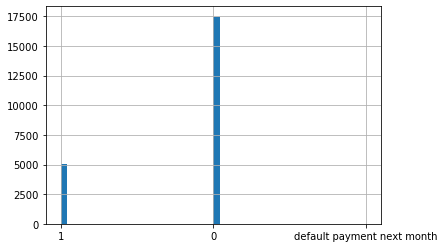

In [6]:
df.Y.hist(bins = 50);

In [7]:
print('Statistics for categorical target variable - Y ')
print('Unique Value :',df['Y'].unique())
print('data proportions :','\n', df.Y.value_counts())
print('data prop percentage :','\n', df.Y.value_counts(normalize = True))
print('num_miss :', df['Y'].isnull().sum())
print('pct_miss :', (df['Y'].isnull().sum()/ len(df)).round(3)*100)

Statistics for categorical target variable - Y 
Unique Value : ['1' '0' 'default payment next month']
data proportions : 
 0                             17471
1                              5028
default payment next month        1
Name: Y, dtype: int64
data prop percentage : 
 0                             0.776489
1                             0.223467
default payment next month    0.000044
Name: Y, dtype: float64
num_miss : 0
pct_miss : 0.0


In [30]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('Y', axis = 1) # grabs everything else but 'Survived'


# Create target variable
y = df['Y'] # y is the column we're trying to predict
X.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X1_log'],
      dtype='object')

In [9]:
df['X3'].value_counts()

2            10516
1             7919
3             3713
5              208
4               90
6               42
0               11
EDUCATION        1
Name: X3, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22500 entries, 28835 to 7624
Data columns (total 24 columns):
X1     22500 non-null object
X2     22500 non-null object
X3     22500 non-null object
X4     22500 non-null object
X5     22500 non-null object
X6     22500 non-null object
X7     22500 non-null object
X8     22500 non-null object
X9     22500 non-null object
X10    22500 non-null object
X11    22500 non-null object
X12    22500 non-null object
X13    22500 non-null object
X14    22500 non-null object
X15    22500 non-null object
X16    22500 non-null object
X17    22500 non-null object
X18    22500 non-null object
X19    22500 non-null object
X20    22500 non-null object
X21    22500 non-null object
X22    22500 non-null object
X23    22500 non-null object
Y      22500 non-null object
dtypes: object(24)
memory usage: 4.3+ MB


In [11]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [12]:
df[df['X1'] == "LIMIT_BAL"]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [13]:
X_dict = {'X1': 'LIMIT_BAL', 
         'X2': 'SEX',
         'X3': 'EDUCATION',
         'X4': 'MARRIAGE',
         'X5': 'AGE',
         'X6': 'PAY_0',
         'X7': 'PAY_2',
         'X8': 'PAY_3',
         'X9': 'PAY_4',
         'X10': 'PAY_5',
         'X11': 'PAY_6',
         'X12': 'BILL_AMT1',
         'X13': 'BILL_AMT2',
         'X14': 'BILL_AMT3',
         'X15': 'BILL_AMT4',
         'X16': 'BILL_AMT5',
         'X17': 'BILL_AMT6',
         'X18': 'PAY_AMT1',
         'X19': 'PAY_AMT2',
         'X20': 'PAY_AMT3',
         'X21': 'PAY_AMT4',
         'X22': 'PAY_AMT5',
         'X23': 'PAY_AMT6',
         'Y' : 'default_pmt_nxt_mnth'}

In [14]:
df.drop(['ID'], inplace = True)

In [15]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,22499,22499,22499,22499,22499,22499,22499,22499,22499,22499,22499,22499,22499,22499,22499,22499,22499,22499,22499,22499,22499,22499,22499,22499
unique,80,2,7,4,55,11,11,11,11,10,10,17664,17340,17115,16767,16325,16092,6630,6568,6257,5756,5749,5788,2
top,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,2534,13572,10516,12026,1243,11057,11804,11823,12330,12706,12233,1492,1849,2129,2390,2594,3000,3905,4036,4440,4840,5015,5418,17471


In [16]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column])


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22499 entries, 28835 to 7624
Data columns (total 24 columns):
X1     22499 non-null int64
X2     22499 non-null int64
X3     22499 non-null int64
X4     22499 non-null int64
X5     22499 non-null int64
X6     22499 non-null int64
X7     22499 non-null int64
X8     22499 non-null int64
X9     22499 non-null int64
X10    22499 non-null int64
X11    22499 non-null int64
X12    22499 non-null int64
X13    22499 non-null int64
X14    22499 non-null int64
X15    22499 non-null int64
X16    22499 non-null int64
X17    22499 non-null int64
X18    22499 non-null int64
X19    22499 non-null int64
X20    22499 non-null int64
X21    22499 non-null int64
X22    22499 non-null int64
X23    22499 non-null int64
Y      22499 non-null int64
dtypes: int64(24)
memory usage: 4.3+ MB


In [39]:
df.isnull().any()

X1        False
X2        False
X3        False
X4        False
X5        False
X6        False
X7        False
X8        False
X9        False
X10       False
X11       False
X12       False
X13       False
X14       False
X15       False
X16       False
X17       False
X18       False
X19       False
X20       False
X21       False
X22       False
X23       False
Y         False
X1_log    False
dtype: bool

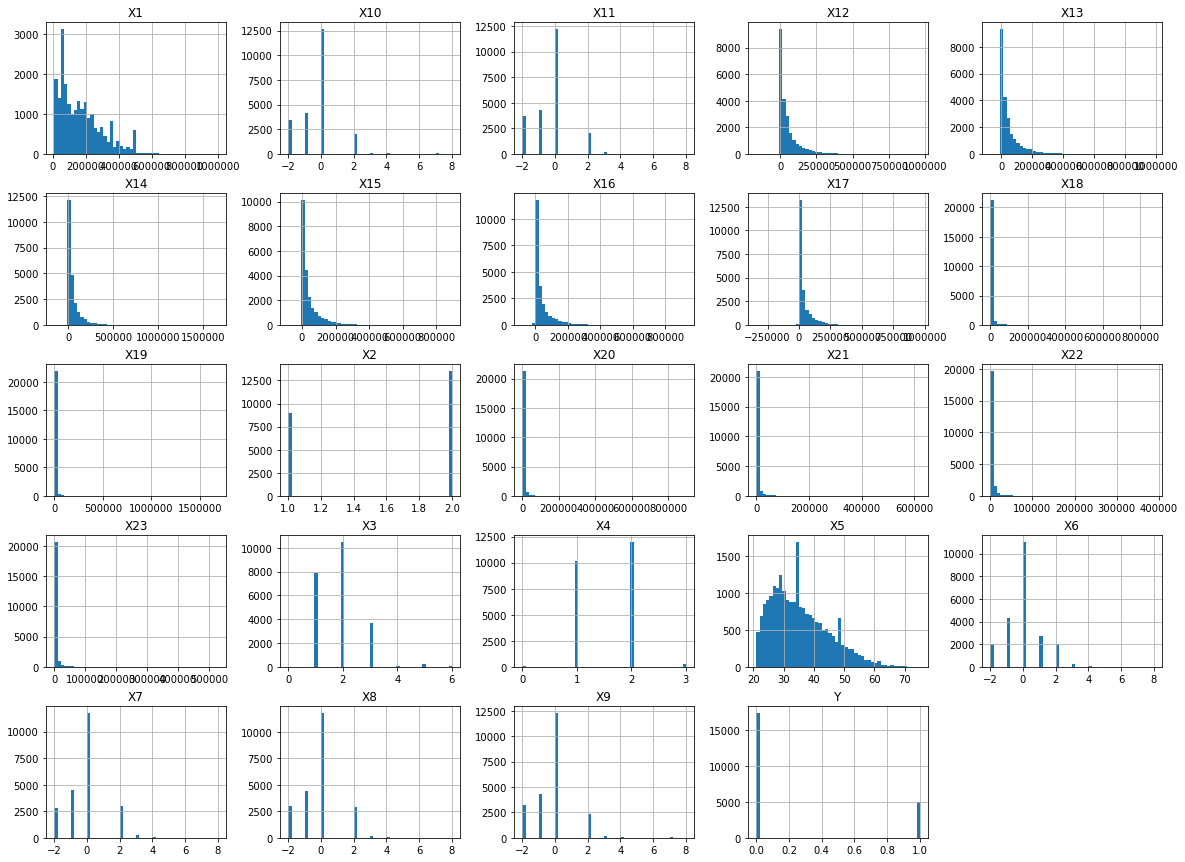

In [96]:
df.hist(bins=50, figsize=(20,15))
plt.show();


In [98]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,167054.521534,1.603227,1.855282,1.553358,35.447931,-0.014090,-0.128806,-0.160185,-0.214587,-0.259700,-0.287613,51455.869416,49385.313214,4.704213e+04,43329.149562,40306.373039,38955.000356,5627.914796,5.964393e+03,5258.912307,4792.971777,4865.656029,5247.279301,0.223477
std,129864.960118,0.489239,0.791905,0.521418,9.237634,1.123191,1.197954,1.198880,1.174824,1.139984,1.154249,74470.257248,71953.814345,6.991792e+04,64607.088483,60918.993067,59773.144959,16628.162287,2.444370e+04,18153.554633,15872.858180,15507.449610,17892.327398,0.416584
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3506.000000,2975.000000,2.611500e+03,2319.500000,1732.500000,1230.000000,1000.000000,8.290000e+02,396.000000,284.000000,246.500000,100.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22387.000000,21145.000000,2.005300e+04,19048.000000,18050.000000,16924.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66988.500000,63755.000000,6.016100e+04,54494.500000,50196.000000,49250.000000,5002.000000,5.000000e+03,4500.000000,4000.000000,4068.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,388071.000000,528666.000000,1.000000


In [85]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,X1_log,avg_billamt
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,12.301383,208387.166667
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,12.206073,326.000000
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,12.100712,0.000000
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,11.289782,46583.666667
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,9.210340,5318.333333


There is an outlier in the X1 variable. A single observation of 1000,000 very far from the mean of 167000. Will drop this one obs.

In [100]:
df[df['X1'] >= 750000]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
14920,800000,1,2,1,53,-1,-1,-1,0,0,-1,7639,5552,64535,40814,12590,9339,11145,64657,131,247,9366,63482,0
28716,780000,2,2,2,41,-2,-2,-2,-2,-2,-2,101957,61715,38686,21482,72628,182792,62819,39558,22204,82097,184322,25695,0
4604,750000,2,3,1,40,-2,-2,-1,-1,-1,-1,16372,15344,3329,38488,9777,66692,15420,3691,38679,9825,67024,76641,0
24321,780000,1,1,1,48,0,0,0,0,0,0,171459,178587,190663,195124,184872,191090,10000,15004,10000,8000,10028,7003,0
10090,750000,2,1,1,41,0,0,0,0,-1,-1,184022,163441,92767,75696,35485,4889,6817,2330,2705,50854,4913,550,0
2198,1000000,2,1,1,47,0,0,0,-1,0,0,964511,983931,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


In [19]:
df[df['X1'] > 850000]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
2198,1000000,2,1,1,47,0,0,0,-1,0,0,964511,983931,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


In [23]:
df.drop('2198', inplace = True)

In [24]:
df[df['X1'] > 850000]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa207009630>]],
      dtype=object)

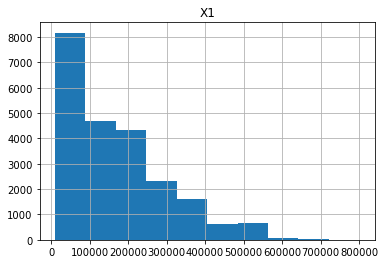

In [25]:
df.hist(column = 'X1')
#skewed to the left

Text(0.5, 1.0, 'Distribution for log of price')

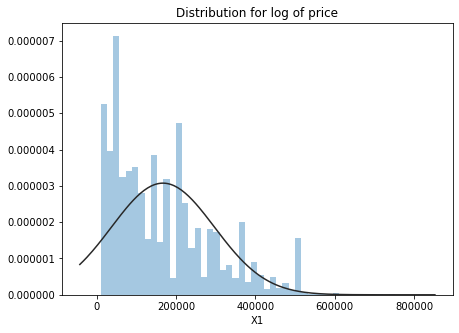

In [29]:
# log of X1 
df['X1_log'] = np.log(df['X1'])

# transformed target histogram and normal probability plot

from scipy.stats import norm

fig = plt.figure(figsize = (7,5))
sns.distplot(df['X1'], fit=norm,  bins=50, kde=False);
plt.title('Distribution for log of price')


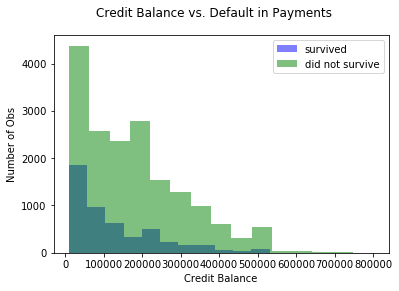

In [36]:
fig, ax = plt.subplots()

ax.hist(df[df["Y"]==1]["X1"], bins=15, alpha=0.5, color="blue", label="defaulted")
ax.hist(df[df["Y"]==0]["X1"], bins=15, alpha=0.5, color="green", label="Made Pmt")

ax.set_xlabel("Credit Balance")
ax.set_ylabel("Number of Obs")

fig.suptitle("Credit Balance vs. Default in Payments ")

ax.legend();

In [43]:
corr = df.corr()
corr[abs(corr > 0.70)]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,X1_log
X1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.900651
X2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X7,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.765691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X8,NaN,NaN,NaN,NaN,NaN,NaN,0.765691,1.000000,0.778817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.778817,1.000000,0.819108,0.720754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819108,1.000000,0.818435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The bill amount variables are all highly correlated to each other. Might be best to use an average bill amount of the six months

In [44]:
df['avg_billamt'] = (df['X12'] + df['X13'] + df['X14'] + df['X15'] + df['X16'] + df['X17'])/6

In [69]:
df[df['X12'] <0]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,X1_log,avg_billamt
6495,180000,2,2,2,35,-2,-2,-2,-2,-2,-2,-117,2573,-77,-77,1823,227,2690,0,0,1900,230,0,0,12.100712,725.333333
22723,270000,2,2,2,36,-2,-2,-2,-1,-1,-1,-33,-33,24646,1585,15376,497,0,24679,4893,15376,497,5373,0,12.506177,7006.333333
792,70000,1,1,2,27,1,-1,-1,-1,-2,-1,-54,273,19,-254,-527,1096,600,19,0,0,1896,0,0,11.156251,92.166667
9985,130000,1,3,2,37,1,-2,-1,0,0,0,-896,-896,2604,2604,1,1,0,3500,0,0,0,0,0,11.775290,569.666667
15113,250000,1,3,1,51,-2,-2,-2,-2,-2,-2,-18,2482,-18,-18,-18,-18,2518,0,0,0,0,0,0,12.429216,398.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26076,430000,2,1,1,38,1,-1,-1,-2,-2,-1,-469,215,-101,-1217,-2333,2351,1000,0,0,0,5000,12000,0,12.971540,-259.000000
10750,50000,1,1,2,27,1,-2,-2,-2,-2,-2,-2900,-2900,-2900,-2900,-2900,-2900,0,0,0,0,0,0,0,10.819778,-2900.000000
14576,160000,1,2,1,43,1,-2,-2,-1,0,0,-3,-3,997,1798,800,0,0,1003,1804,202,0,50000,0,11.982929,598.166667
11573,240000,2,3,1,36,1,-1,-1,-1,2,0,-608,1966,4421,8521,8323,16620,5000,5000,10112,0,13000,10000,0,12.388394,6540.500000


In [62]:
df['avg_billamt'].describe()

count     22498.000000
mean      45041.980620
std       63475.891206
min      -56043.166667
25%        4726.000000
50%       20895.666667
75%       57099.958333
max      592431.833333
Name: avg_billamt, dtype: float64

In [47]:
df['avg_billamt'].corr(df['Y'])

-0.011168764241021815

In [50]:
df.corr()['Y'].sort_values()

X1_log        -0.175769
X1            -0.155949
X18           -0.071416
X19           -0.057596
X20           -0.055963
X23           -0.055244
X21           -0.054482
X22           -0.054117
X2            -0.037934
X4            -0.028528
X12           -0.016621
X14           -0.012425
X13           -0.011495
avg_billamt   -0.011169
X15           -0.009390
X16           -0.006872
X17           -0.005166
X5             0.014616
X3             0.031859
X11            0.193492
X10            0.208236
X9             0.219131
X8             0.241580
X7             0.266814
X6             0.324774
Y              1.000000
Name: Y, dtype: float64

In [60]:
for col in df.columns:
#     df[col].value_counts()
    print(col)
    print(df[col].value_counts())

# df['X1'].value_counts()
# df.columns

X1
50000     2534
20000     1488
30000     1223
80000     1210
200000    1134
          ... 
16000        2
740000       1
690000       1
800000       1
327680       1
Name: X1, Length: 79, dtype: int64
X2
2    13571
1     8927
Name: X2, dtype: int64
X3
2    10516
1     7918
3     3713
5      208
4       90
6       42
0       11
Name: X3, dtype: int64
X4
2    12026
1    10194
3      234
0       44
Name: X4, dtype: int64
X5
29    1243
27    1100
28    1064
30    1026
26     959
25     904
31     902
32     878
33     874
34     859
24     851
35     841
36     812
37     799
38     720
39     703
23     690
40     656
41     613
42     597
44     512
43     495
45     462
46     421
22     420
47     339
48     339
49     326
50     298
51     269
53     241
52     236
54     184
55     154
56     147
57      89
58      89
59      62
21      56
60      56
61      45
62      32
64      24
63      24
66      21
65      17
67      13
70      10
69      10
68       5
73       3
72       3
7

In [61]:
df.nunique()

X1                79
X2                 2
X3                 7
X4                 4
X5                55
X6                11
X7                11
X8                11
X9                11
X10               10
X11               10
X12            17663
X13            17339
X14            17114
X15            16766
X16            16324
X17            16091
X18             6629
X19             6567
X20             6256
X21             5756
X22             5749
X23             5787
Y                  2
X1_log            79
avg_billamt    20732
dtype: int64

## 2. EDA

## 3. Feature Engineering

## 4. Feature Selection

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## 6. Model Evaluation

## 7. Final Model